In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import seaborn as sns
import statsmodels.api as sms
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# import plotly.express as px

In [2]:
df = pd.read_csv("Group 2 (2).csv")

In [3]:
del df[df.columns[0]]

In [4]:
df.shape

(7350, 11)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   7350 non-null   object 
 1   gender        7350 non-null   object 
 2   location      7350 non-null   object 
 3   partner       7350 non-null   int64  
 4   dependents    7350 non-null   object 
 5   senior        7350 non-null   int64  
 6   Tenure        7350 non-null   float64
 7   monthly_cost  67 non-null     object 
 8   package       7350 non-null   int64  
 9   survey        7350 non-null   object 
 10  Class         7301 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 631.8+ KB
None


In [6]:
df.head()

,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,K3713,Male,Hampshire,0,Unknown,0,12.0,NaN,1,6,Churn=No
1,D9048,Male,Greater Manchester,1,1,0,21.0,NaN,4,6,Churn=No
2,K8227,Female,West Yorkshire,0,Unknown,0,0.0,NaN,1,4,Churn=Yes
3,H3533,Male,Greater London,1,1,1,11.0,NaN,2,4,Churn=No
4,J4501,Male,Greater London,0,0,0,7.0,NaN,4,2,Churn=Yes


In [7]:
print(df.isnull().sum())

customer_id        0
gender             0
location           0
partner            0
dependents         0
senior             0
Tenure             0
monthly_cost    7283
package            0
survey             0
Class             49
dtype: int64


In [8]:
duplicateRowsDF = df[df['customer_id'].duplicated()]
duplicateRowsDF
df = df.drop_duplicates(subset=["customer_id"], keep='first')
df.shape

(6752, 11)

In [9]:
df.shape

(6752, 11)

In [10]:
df.dtypes

customer_id      object
gender           object
location         object
partner           int64
dependents       object
senior            int64
Tenure          float64
monthly_cost     object
package           int64
survey           object
Class            object
dtype: object

In [11]:
df.describe()

,partner,senior,Tenure,package
count,6752.000000,6752.000000,6752.000000,6752.000000
mean,0.547393,0.173134,8.722439,2.427725
std,0.497786,0.378391,6.408113,1.152222
min,0.000000,0.000000,-4.690416,1.000000
25%,0.000000,0.000000,3.000000,1.000000
50%,1.000000,0.000000,8.000000,2.000000
75%,1.000000,0.000000,14.000000,4.000000
max,1.000000,1.000000,30.000000,4.000000


In [12]:
df['monthly_cost'][df.package==1]=26
df['monthly_cost'][df.package==2]=34
df['monthly_cost'][df.package==3]=40
df['monthly_cost'][df.package==4]=47

In [13]:
df.head()

,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,K3713,Male,Hampshire,0,Unknown,0,12.0,26,1,6,Churn=No
1,D9048,Male,Greater Manchester,1,1,0,21.0,47,4,6,Churn=No
2,K8227,Female,West Yorkshire,0,Unknown,0,0.0,26,1,4,Churn=Yes
3,H3533,Male,Greater London,1,1,1,11.0,34,2,4,Churn=No
4,J4501,Male,Greater London,0,0,0,7.0,47,4,2,Churn=Yes


In [14]:
df = df.dropna()

In [15]:
df.shape

(6704, 11)

In [16]:
print(df['Class'].value_counts())

Churn=No     4778
Churn=Yes    1911
Y$e$s$$        15
Name: Class, dtype: int64


In [17]:
df['monthly_cost']=df['monthly_cost'].astype(int)

In [18]:
df.shape

(6704, 11)

In [19]:
churn_numeric = {'Y$e$s$$':'Churn=Yes'}
df.Class.replace(churn_numeric, inplace=True)

In [20]:
df.dtypes

customer_id      object
gender           object
location         object
partner           int64
dependents       object
senior            int64
Tenure          float64
monthly_cost      int32
package           int64
survey           object
Class            object
dtype: object

In [21]:
print(df['Class'].value_counts())

Churn=No     4778
Churn=Yes    1926
Name: Class, dtype: int64


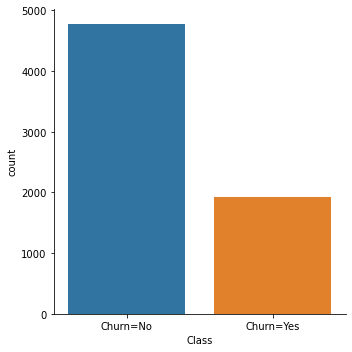

In [22]:
ax6 = sns.catplot(x="Class", kind="count", data=df) 

#### Numerical data

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

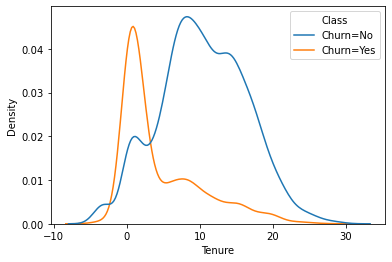

In [23]:
sns.kdeplot(data=df, x="Tenure", hue="Class")

<AxesSubplot:xlabel='monthly_cost', ylabel='Density'>

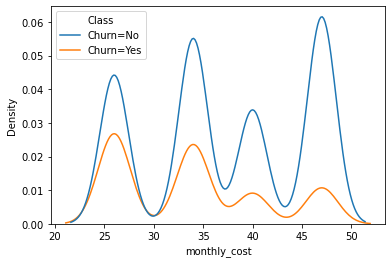

In [24]:
sns.kdeplot(data=df, x="monthly_cost", hue="Class")

#### Gender:

In [25]:
print(df['gender'].value_counts())

Male      3380
Female    3324
Name: gender, dtype: int64


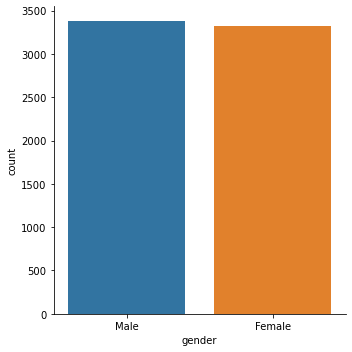

In [26]:
sns.catplot(x="gender", kind="count", data=df) 

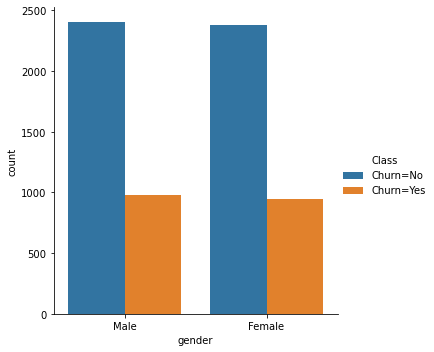

In [27]:
sns.catplot(x="gender", kind="count", hue="Class", data=df)

<AxesSubplot:xlabel='gender', ylabel='monthly_cost'>

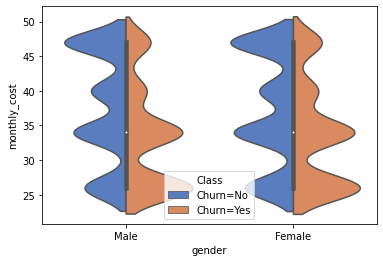

In [28]:
sns.violinplot(x="gender", y="monthly_cost",hue="Class", data=df,palette="muted", split=True)

<AxesSubplot:xlabel='gender', ylabel='Tenure'>

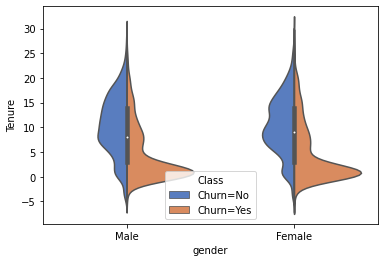

In [29]:
sns.violinplot(x="gender", y="Tenure",hue="Class", data=df,palette="muted", split=True)

#### Partner

In [30]:
print(df['partner'].value_counts())

1    3667
0    3037
Name: partner, dtype: int64


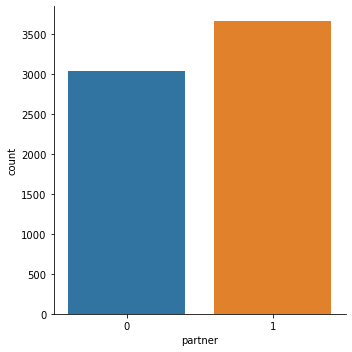

In [31]:
sns.catplot(x="partner", kind="count", data=df) 

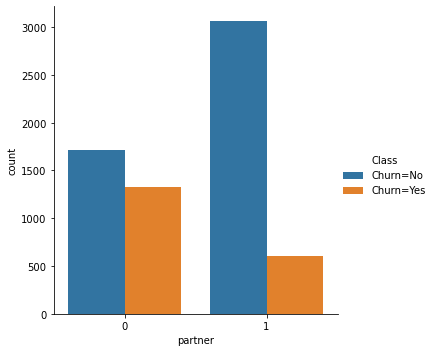

In [32]:
sns.catplot(x="partner", kind="count", hue="Class", data=df)

<AxesSubplot:xlabel='partner', ylabel='monthly_cost'>

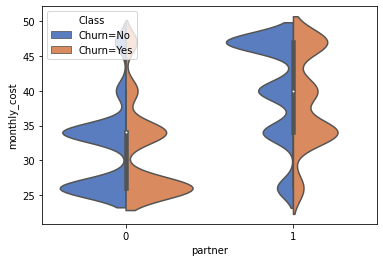

In [33]:
sns.violinplot(x="partner", y="monthly_cost",hue="Class", data=df,palette="muted", split=True)

<AxesSubplot:xlabel='partner', ylabel='Tenure'>

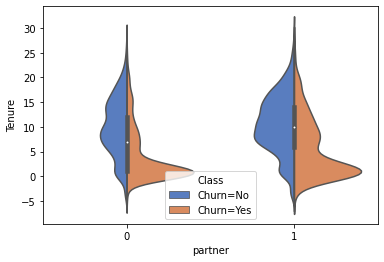

In [34]:
sns.violinplot(x="partner", y="Tenure",hue="Class", data=df,palette="muted", split=True)

#### Dependents

In [35]:
print(df['dependents'].value_counts())

1          3151
Unknown    2067
0          1486
Name: dependents, dtype: int64


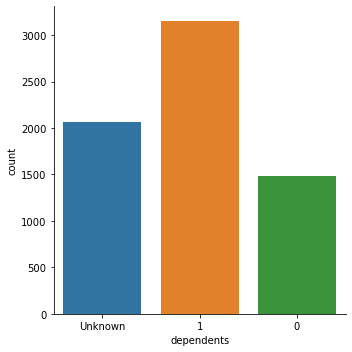

In [36]:
sns.catplot(x="dependents", kind="count", data=df) 

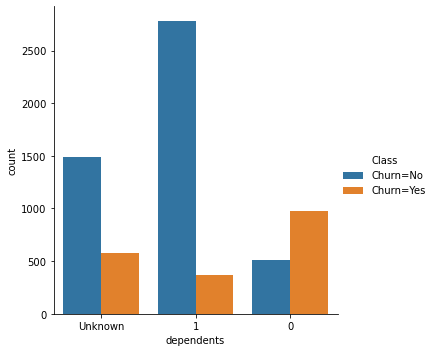

In [37]:
sns.catplot(x="dependents", kind="count", hue="Class", data=df)

<AxesSubplot:xlabel='dependents', ylabel='monthly_cost'>

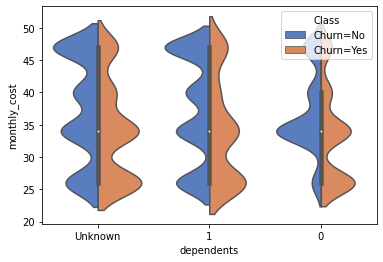

In [38]:
sns.violinplot(x="dependents", y="monthly_cost",hue="Class", data=df,palette="muted", split=True)

<AxesSubplot:xlabel='dependents', ylabel='Tenure'>

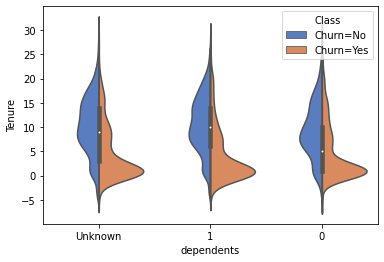

In [39]:
sns.violinplot(x="dependents", y="Tenure",hue="Class", data=df,palette="muted", split=True)

#### Seniors

In [40]:
print(df['senior'].value_counts())

0    5546
1    1158
Name: senior, dtype: int64


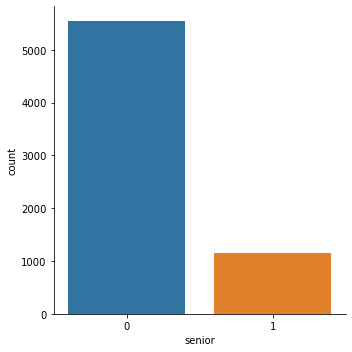

In [41]:
sns.catplot(x="senior", kind="count", data=df) 

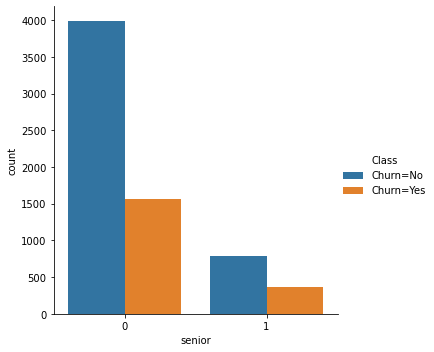

In [42]:
sns.catplot(x="senior", kind="count", hue="Class", data=df)

<AxesSubplot:xlabel='senior', ylabel='monthly_cost'>

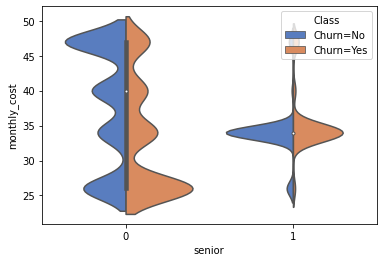

In [43]:
sns.violinplot(x="senior", y="monthly_cost",hue="Class", data=df,palette="muted", split=True)

<AxesSubplot:xlabel='senior', ylabel='Tenure'>

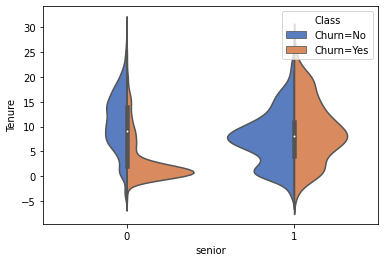

In [44]:
sns.violinplot(x="senior", y="Tenure",hue="Class", data=df,palette="muted", split=True)

#### Location

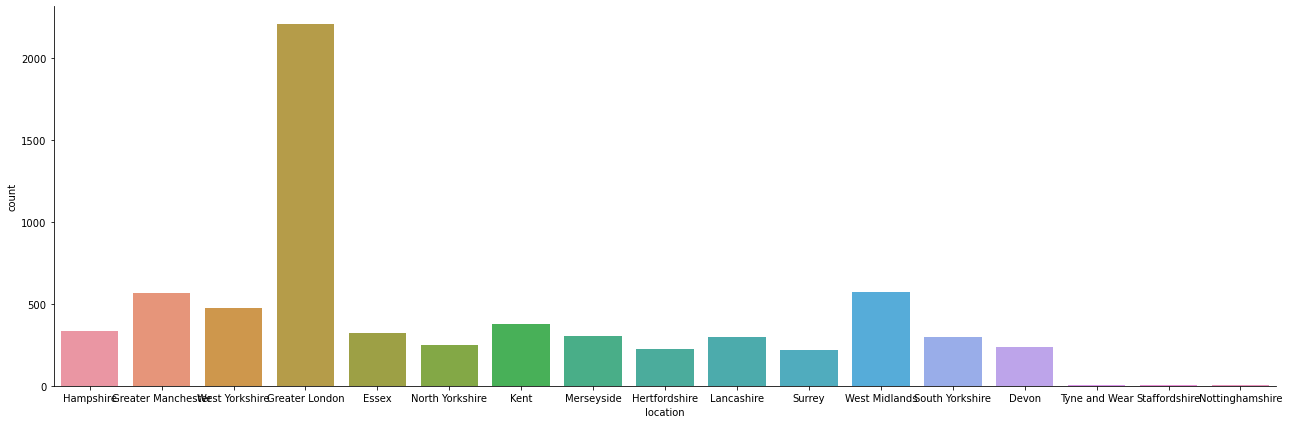

In [45]:
sns.catplot(x="location", kind="count", data=df,height=6, aspect=3) 

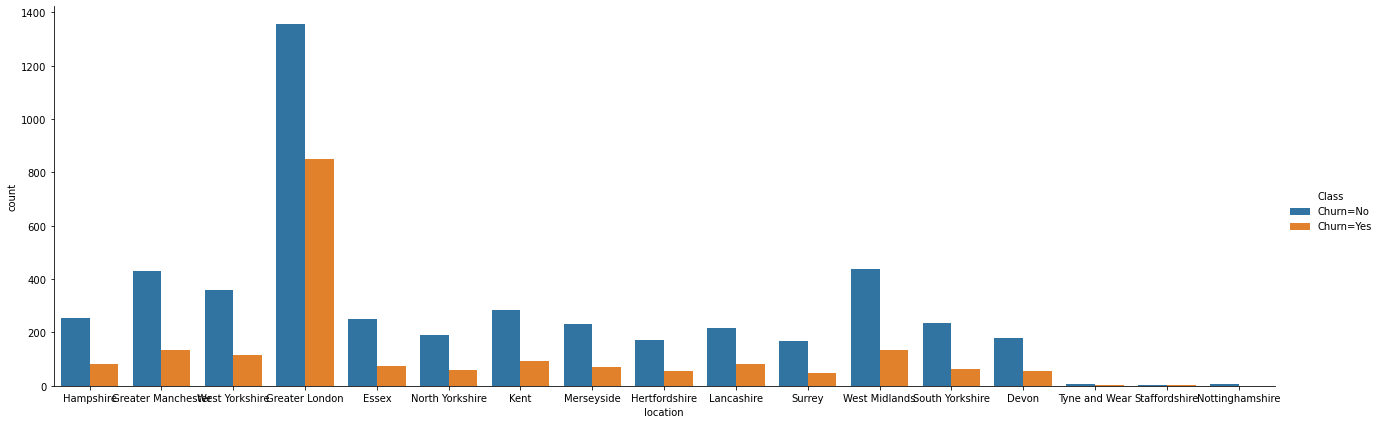

In [46]:
sns.catplot(x="location", kind="count", hue="Class", data=df,height=6, aspect=3)

<AxesSubplot:xlabel='location', ylabel='monthly_cost'>

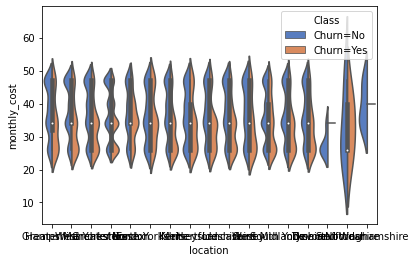

In [47]:
sns.violinplot(x="location", y="monthly_cost",hue="Class", data=df,palette="muted", split=True)

<AxesSubplot:xlabel='location', ylabel='Tenure'>

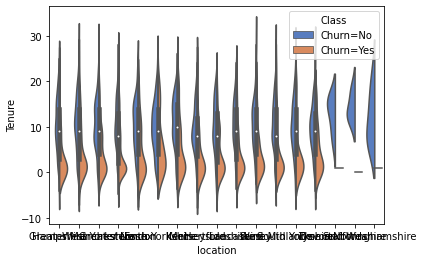

In [48]:
sns.violinplot(x="location", y="Tenure",hue="Class", data=df,palette="muted", split=True)

Survey

In [49]:
print(df['survey'].value_counts())

6           1090
5            956
7            865
2            654
4            625
1            568
3            539
No reply     507
8            476
0            218
9            177
10            29
Name: survey, dtype: int64


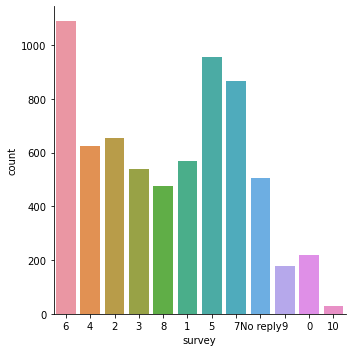

In [50]:
sns.catplot(x="survey", kind="count", data=df) 

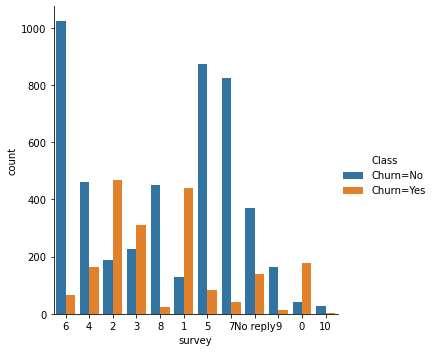

In [51]:
sns.catplot(x="survey", kind="count", hue="Class", data=df)

<AxesSubplot:xlabel='survey', ylabel='monthly_cost'>

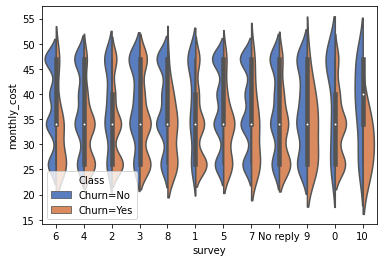

In [52]:
sns.violinplot(x="survey", y="monthly_cost",hue="Class", data=df,palette="muted", split=True)

<AxesSubplot:xlabel='survey', ylabel='Tenure'>

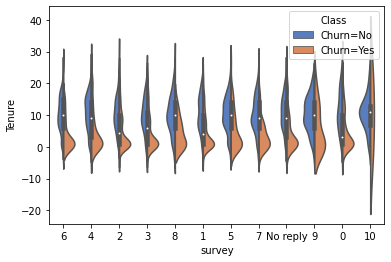

In [53]:
sns.violinplot(x="survey", y="Tenure",hue="Class", data=df,palette="muted", split=True)

H0:people who dont have dependents are churning more.

Data pre processing

In [54]:
churn_numeric = {'Churn=Yes':1, 'Churn=No':0,'Y$e$s$$':1}
df.Class.replace(churn_numeric, inplace=True)
df.gender.replace({'Female':0,'Male':1},inplace=True)

In [55]:
df=df.replace(['West Midlands', 'Greater Manchester', 'West Yorkshire', 'Kent','Hampshire','Essex','Lancashire','Merseyside','South Yorkshire','North Yorkshire','Devon','Hertfordshire','Surrey','Tyne and Wear','Nottinghamshire','Staffordshire'], 'Non london area')
df=pd.get_dummies(df,columns=['location'])
df

,customer_id,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,location_Greater London,location_Non london area
0,K3713,1,0,Unknown,0,12.0,26,1,6,0,0,1
1,D9048,1,1,1,0,21.0,47,4,6,0,0,1
2,K8227,0,0,Unknown,0,0.0,26,1,4,1,0,1
3,H3533,1,1,1,1,11.0,34,2,4,0,1,0
4,J4501,1,0,0,0,7.0,47,4,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7344,I3187,1,1,Unknown,0,0.0,26,1,6,1,1,0
7345,H7244,0,0,0,0,1.0,26,1,1,1,1,0
7347,I5775,1,1,1,0,16.0,47,4,2,0,1,0
7348,E9984,0,0,1,0,17.0,26,1,4,1,1,0


In [56]:
df.groupby('dependents')['Class'].value_counts()

dependents  Class
0           1         973
            0         513
1           0        2780
            1         371
Unknown     0        1485
            1         582
Name: Class, dtype: int64

In [57]:
df.gender.replace({'Male':0,'Female':1}, inplace=True)
df.loc[df['Tenure'] < 0, 'Tenure'] = 0

In [58]:
df['Tenure']=df['Tenure'].astype(int)
# df['dependents']=df['dependents'].astype(int)
# df['survey']=df['survey'].astype(int)
df['Class']=df['Class'].astype(int)
df['monthly_cost']=df['monthly_cost'].astype(int)
df['location_Greater London']=df['location_Greater London'].astype(int)
df['location_Non london area']=df['location_Non london area'].astype(int)

In [59]:
df['Tenure'] = MinMaxScaler().fit_transform(np.array(df['Tenure']).reshape(-1,1))
df['monthly_cost'] = MinMaxScaler().fit_transform(np.array(df['monthly_cost']).reshape(-1,1))  
# view normalized data  
display(df)

,customer_id,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,location_Greater London,location_Non london area
0,K3713,1,0,Unknown,0,0.400000,0.000000,1,6,0,0,1
1,D9048,1,1,1,0,0.700000,1.000000,4,6,0,0,1
2,K8227,0,0,Unknown,0,0.000000,0.000000,1,4,1,0,1
3,H3533,1,1,1,1,0.366667,0.380952,2,4,0,1,0
4,J4501,1,0,0,0,0.233333,1.000000,4,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7344,I3187,1,1,Unknown,0,0.000000,0.000000,1,6,1,1,0
7345,H7244,0,0,0,0,0.033333,0.000000,1,1,1,1,0
7347,I5775,1,1,1,0,0.533333,1.000000,4,2,0,1,0
7348,E9984,0,0,1,0,0.566667,0.000000,1,4,1,1,0


In [60]:
df1_test=df[df['dependents'] == "Unknown"]
df2_train=df[df['dependents'] != "Unknown"] #df2 main
df1_test.shape,df2_train.shape


((2067, 12), (4637, 12))

In [61]:
df2_train['dependents']=df2_train['dependents'].astype(int)
classifier = LogisticRegression()
classifier.fit(df2_train[['gender','partner','senior','Tenure','Class']], df2_train['dependents'])
pred=classifier.predict(df1_test[['gender','partner','senior','Tenure','Class']])
pred

array([1, 0, 1, ..., 1, 1, 0])

In [62]:
df1_test['dependents']=pred
df1_test

,customer_id,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,location_Greater London,location_Non london area
0,K3713,1,0,1,0,0.400000,0.000000,1,6,0,0,1
2,K8227,0,0,0,0,0.000000,0.000000,1,4,1,0,1
5,K3269,0,1,1,0,0.600000,0.000000,1,3,0,0,1
7,E1851,1,0,1,0,0.066667,0.000000,1,4,0,0,1
8,H3588,0,1,0,0,0.400000,0.666667,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7334,D4511,1,1,1,0,0.566667,1.000000,4,7,0,1,0
7337,G4484,0,0,1,0,0.000000,0.000000,1,7,0,0,1
7341,C8964,0,1,1,0,0.766667,0.666667,3,4,0,1,0
7342,D1975,0,1,1,0,0.300000,0.380952,2,7,0,0,1


In [63]:
df=pd.concat([df2_train,df1_test])
df=df.drop(['customer_id'], axis=1)

In [64]:
df = df.reset_index(drop=True)
df

,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,location_Greater London,location_Non london area
0,1,1,1,0,0.700000,1.000000,4,6,0,0,1
1,1,1,1,1,0.366667,0.380952,2,4,0,1,0
2,1,0,0,0,0.233333,1.000000,4,2,1,1,0
3,0,1,0,0,0.533333,1.000000,4,8,0,0,1
4,1,0,1,0,0.633333,0.000000,1,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6699,1,1,1,0,0.566667,1.000000,4,7,0,1,0
6700,0,0,1,0,0.000000,0.000000,1,7,0,0,1
6701,0,1,1,0,0.766667,0.666667,3,4,0,1,0
6702,0,1,1,0,0.300000,0.380952,2,7,0,0,1


In [65]:
df['survey'] = df['survey'].replace(['No reply'],df['survey'].mode())

In [66]:
df['dependents']=df['dependents'].astype(int)
df['survey']=df['survey'].astype(int)

In [67]:
df

,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,location_Greater London,location_Non london area
0,1,1,1,0,0.700000,1.000000,4,6,0,0,1
1,1,1,1,1,0.366667,0.380952,2,4,0,1,0
2,1,0,0,0,0.233333,1.000000,4,2,1,1,0
3,0,1,0,0,0.533333,1.000000,4,8,0,0,1
4,1,0,1,0,0.633333,0.000000,1,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6699,1,1,1,0,0.566667,1.000000,4,7,0,1,0
6700,0,0,1,0,0.000000,0.000000,1,7,0,0,1
6701,0,1,1,0,0.766667,0.666667,3,4,0,1,0
6702,0,1,1,0,0.300000,0.380952,2,7,0,0,1


In [68]:
import statsmodels.api as sm
x = df.drop(['Class'],axis=1)
y = df['Class']
 
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1241.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:08:07   Log-Likelihood:                -907.01
No. Observations:                6704   AIC:                             1834.
Df Residuals:                    6694   BIC:                             1902.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [70]:
df = df.drop(columns=['gender', 'package'])

In [73]:
df

,partner,dependents,senior,Tenure,monthly_cost,survey,Class,location_Greater London,location_Non london area
0,1,1,0,0.700000,1.000000,6,0,0,1
1,1,1,1,0.366667,0.380952,4,0,1,0
2,0,0,0,0.233333,1.000000,2,1,1,0
3,1,0,0,0.533333,1.000000,8,0,0,1
4,0,1,0,0.633333,0.000000,8,0,0,1
...,...,...,...,...,...,...,...,...,...
6699,1,1,0,0.566667,1.000000,7,0,1,0
6700,0,1,0,0.000000,0.000000,7,0,0,1
6701,1,1,0,0.766667,0.666667,4,0,1,0
6702,1,1,0,0.300000,0.380952,7,0,0,1


In [74]:
df.dtypes

partner                       int64
dependents                    int32
senior                        int64
Tenure                      float64
monthly_cost                float64
survey                        int32
Class                         int32
location_Greater London       int32
location_Non london area      int32
dtype: object

In [75]:
# df['survey'] = MinMaxScaler().fit_transform(np.array(df['survey']).reshape(-1,1))
# #df['monthly_cost'] = MinMaxScaler().fit_transform(np.array(df['monthly_cost']).reshape(-1,1))  
# # view normalized data  
# display(df)

In [76]:
df.dtypes

partner                       int64
dependents                    int32
senior                        int64
Tenure                      float64
monthly_cost                float64
survey                        int32
Class                         int32
location_Greater London       int32
location_Non london area      int32
dtype: object

In [77]:
print(df['Class'].value_counts())

0    4778
1    1926
Name: Class, dtype: int64


In [78]:
from sklearn.utils import resample
df_major=df[df.Class==0]
df_minor=df[df.Class==1]

df_minority_upsampled = resample(df_minor, replace=True,n_samples=4778,random_state=30) 

df_upsamp_ML=pd.concat([df_major, df_minority_upsampled])
print(df_upsamp_ML['Class'].value_counts())

0    4778
1    4778
Name: Class, dtype: int64


In [79]:
df_upsamp_ML

,partner,dependents,senior,Tenure,monthly_cost,survey,Class,location_Greater London,location_Non london area
0,1,1,0,0.700000,1.000000,6,0,0,1
1,1,1,1,0.366667,0.380952,4,0,1,0
3,1,0,0,0.533333,1.000000,8,0,0,1
4,0,1,0,0.633333,0.000000,8,0,0,1
7,1,1,0,0.133333,1.000000,4,0,0,1
...,...,...,...,...,...,...,...,...,...
2855,0,0,0,0.200000,0.000000,2,1,1,0
3987,0,0,0,0.033333,0.380952,2,1,1,0
1195,0,0,0,0.066667,1.000000,1,1,1,0
5941,0,0,0,0.066667,1.000000,5,1,1,0


In [80]:
# x=df_upsamp_ML.drop(['Class','location_Greater London','location_Non london area'],axis=1)
x=df_upsamp_ML.drop(['Class'],axis=1)
y=df_upsamp_ML['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20,random_state=30)

In [81]:
x.dtypes

partner                       int64
dependents                    int32
senior                        int64
Tenure                      float64
monthly_cost                float64
survey                        int32
location_Greater London       int32
location_Non london area      int32
dtype: object

In [82]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [83]:
modelLogistic.coef_

array([[-0.84071217, -3.4135005 , -0.31291039, -4.269768  , -0.69463555,
        -0.63884516,  0.38282083, -0.38360583]])

In [84]:
y_pred= modelLogistic.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

Accuracy: 89.33%
Precision: 89.86%
Recall: 89.68%
F1_Score: 89.77%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

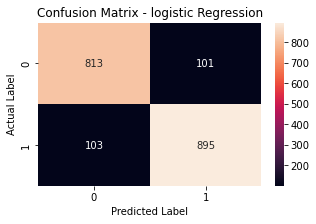

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusionmatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - logistic Regression')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [86]:
# import statsmodels.api as sm
# x_train = sm.add_constant(x_train)
# logit_model=sm.Logit(y_train,x_train)
# result=logit_model.fit()
# print(result.summary())

In [87]:
modelKNN = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
modelKNN.fit(x_train,y_train)
pred_yknn=modelKNN.predict(x_test)
pred_yknn

array([1, 0, 1, ..., 0, 0, 0])

Accuracy: 91.47%
Precision: 93.53%
Recall: 89.88%
F1_Score: 91.67%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

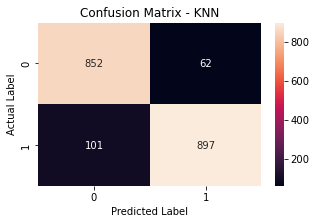

In [107]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, pred_yknn) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, pred_yknn) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, pred_yknn) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, pred_yknn) * 100))
confusionmatrix = confusion_matrix(y_test, pred_yknn)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - KNN')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [89]:
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier()
modelrf.fit(x_train, y_train)
pred_Yrf = modelrf.predict(x_test)

In [108]:
modelrf.feature_importances_

array([0.0593127 , 0.31572086, 0.0416468 , 0.22858003, 0.04276845,
       0.29541171, 0.00765033, 0.00890911])

Text(0, 0.5, 'Importance')

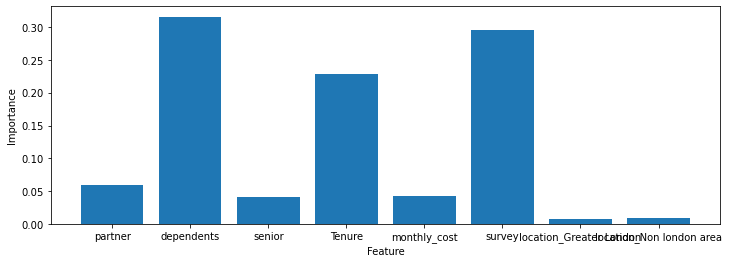

In [113]:
plt.figure(figsize=(12,4))
plt.bar(x.columns, modelrf.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")

Accuracy: 94.61%
Precision: 93.92%
Recall: 95.89%
F1_Score: 94.89%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

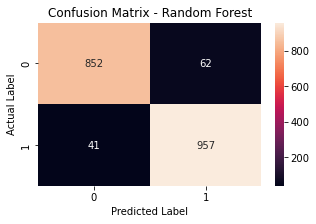

In [100]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, pred_Yrf) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, pred_Yrf) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, pred_Yrf) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, pred_Yrf) * 100))
confusionmatrix = confusion_matrix(y_test, pred_Yrf)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [91]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(x_train, y_train)
pred_YNB = modelNB.predict(x_test)

Accuracy: 89.07%
Precision: 89.33%
Recall: 89.78%
F1_Score: 89.56%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

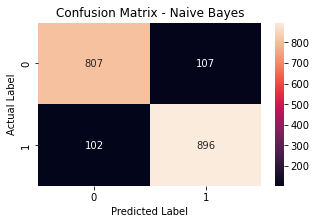

In [104]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, pred_YNB) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, pred_YNB) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, pred_YNB) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, pred_YNB) * 100))
confusionmatrix = confusion_matrix(y_test, pred_YNB)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Naive Bayes')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [93]:
from sklearn.svm import SVC
modelSVC = SVC()
modelSVC.fit(x_train, y_train)
pred_YSVC = modelSVC.predict(x_test)

Accuracy: 90.22%
Precision: 91.17%
Recall: 89.98%
F1_Score: 90.57%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

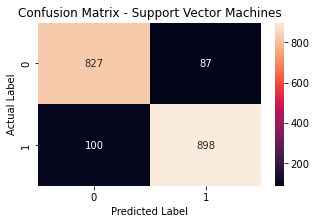

In [105]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, pred_YSVC) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, pred_YSVC) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, pred_YSVC) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, pred_YSVC) * 100))
confusionmatrix = confusion_matrix(y_test, pred_YSVC)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Support Vector Machines')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB =GradientBoostingClassifier()
modelGB.fit(x_train, y_train)
pred_GB = modelGB.predict(x_test)

Accuracy: 92.89%
Precision: 93.45%
Recall: 92.89%
F1_Score: 93.17%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

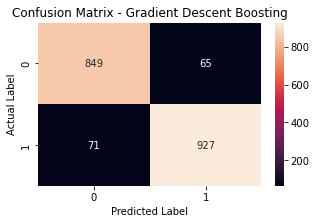

In [106]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, pred_GB) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, pred_GB) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, pred_GB) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, pred_GB) * 100))
confusionmatrix = confusion_matrix(y_test, pred_GB)
plt.figure(figsize=(5,3))
ax = plt.subplot()
sns.heatmap(confusionmatrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Gradient Descent Boosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])